[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alihaider-debug/Cricketdataanalysis/blob/main/Task2.ipynb)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
github_url = "https://github.com/alihaider-debug/Cricketdataanalysis/raw/main/ODI_Match_Data.csv"
df = pd.read_csv(github_url)

<ipython-input-4-9226430c1130>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(github_url)


**1. Histograms for Numeric Features**

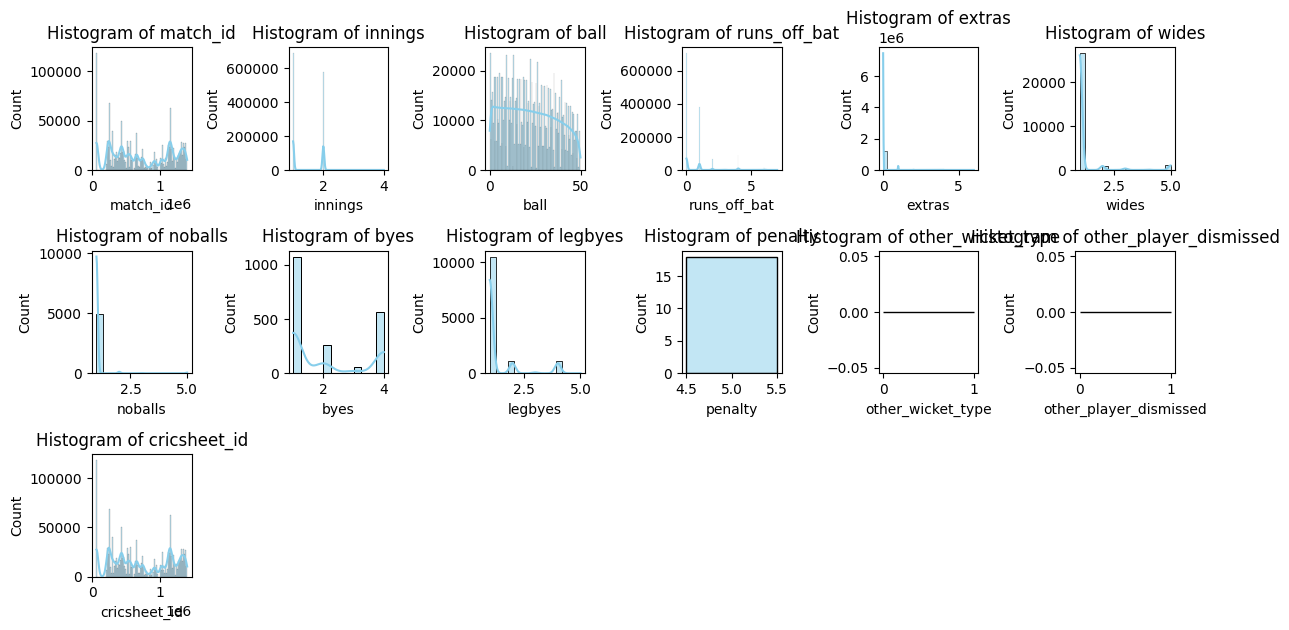

In [5]:
# 1. Histograms for Numeric Features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 6, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

**2. Scatter Plots and Correlation Matrix**

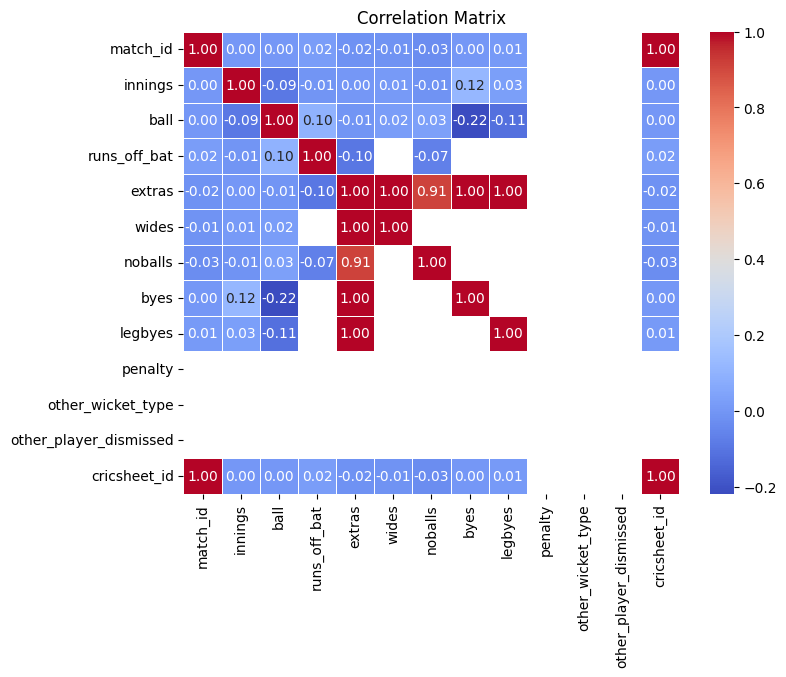

In [7]:
# 2. Scatter Plots and Correlation Matrix
plt.figure(figsize=(8, 6))
# Specify numeric_only=True to only include numeric columns in the correlation
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**3. Boxplots to Identify Outliers**

Skipping boxplot for column 'wides' due to missing or non-numeric values.
Skipping boxplot for column 'noballs' due to missing or non-numeric values.
Skipping boxplot for column 'byes' due to missing or non-numeric values.
Skipping boxplot for column 'legbyes' due to missing or non-numeric values.
Skipping boxplot for column 'penalty' due to missing or non-numeric values.
Skipping boxplot for column 'other_wicket_type' due to missing or non-numeric values.
Skipping boxplot for column 'other_player_dismissed' due to missing or non-numeric values.


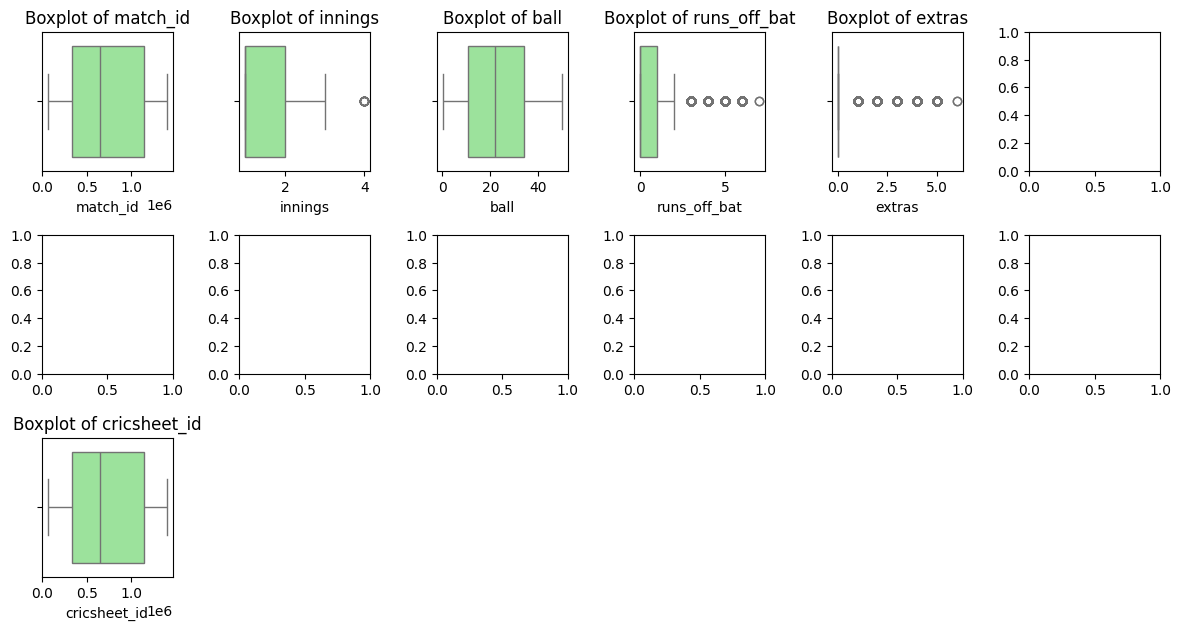

In [10]:
# 3. Boxplots to Identify Outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_features, 1):
    if df[col].dtype in [np.int64, np.float64]:  # Check if the column is numeric
        plt.subplot(4, 6, i)
        # Check if the column has any missing or non-numeric values and handle them
        if df[col].isnull().any() or df[col].apply(lambda x: isinstance(x, (int, float))).all() == False:
            print(f"Skipping boxplot for column '{col}' due to missing or non-numeric values.")
            continue  # Skip to the next column
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**4. Identify and Handle Missing Values**

In [11]:
# 4. Identify and Handle Missing Values
missing_values = df.isnull().sum()
print('Missing Values Before Handling:', missing_values)

for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)
print('Missing Values After Handling:', df.isnull().sum())


Missing Values Before Handling: match_id                        0
season                          0
start_date                      0
venue                           0
innings                         0
ball                            0
batting_team                    0
bowling_team                    0
striker                         0
non_striker                     0
bowler                          0
runs_off_bat                    0
extras                          0
wides                     1236113
noballs                   1260045
byes                      1263141
legbyes                   1252200
penalty                   1265085
wicket_type               1230629
player_dismissed          1230629
other_wicket_type         1265103
other_player_dismissed    1265103
cricsheet_id                    0
dtype: int64


<ipython-input-11-452c049e8aa4>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-11-452c049e8aa4>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Missing Values After Handling: match_id                        0
season                          0
start_date                      0
venue                           0
innings                         0
ball                            0
batting_team                    0
bowling_team                    0
striker                         0
non_striker                     0
bowler                          0
runs_off_bat                    0
extras                          0
wides                           0
noballs                         0
byes                            0
legbyes                         0
penalty                         0
wicket_type                     0
player_dismissed                0
other_wicket_type         1265103
other_player_dismissed    1265103
cricsheet_id                    0
dtype: int64


**5. Identify Outliers using IQR Method**

In [12]:
# 5. Identify Outliers using IQR Method
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f'Outliers in {col}: {outliers.shape[0]}')

Outliers in match_id: 0
Outliers in innings: 15
Outliers in ball: 0
Outliers in runs_off_bat: 116604
Outliers in extras: 48910
Outliers in wides: 2346
Outliers in noballs: 96
Outliers in byes: 886
Outliers in legbyes: 2376
Outliers in penalty: 0
Outliers in other_wicket_type: 0
Outliers in other_player_dismissed: 0
Outliers in cricsheet_id: 0


**6. Identify Important Features using Correlation**

In [13]:
# 6. Identify Important Features using Correlation
important_features = correlation_matrix.abs().unstack().sort_values(ascending=False)
important_features = important_features[important_features < 1].head(10)
print('Top 10 Important Feature Correlations:\n', important_features)


Top 10 Important Feature Correlations:
 extras   wides      0.999314
wides    extras     0.999314
legbyes  extras     0.998467
extras   legbyes    0.998467
byes     extras     0.998098
extras   byes       0.998098
noballs  extras     0.913445
extras   noballs    0.913445
ball     byes       0.218532
byes     ball       0.218532
dtype: float64
